In [3]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
from matplotlib import pyplot as plt


from torch.utils.data import Dataset
from torchvision import transforms

class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform = None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        #Read an image with PIL
        image = Image.open(file_path)
        
        start_t = time.time()
        if self.transform:
            image = self.transform(image)
        total_time = (time.time() - start_t)
        
        return image, label, total_time



torchvision time/sample: 132.90215253829956 ms


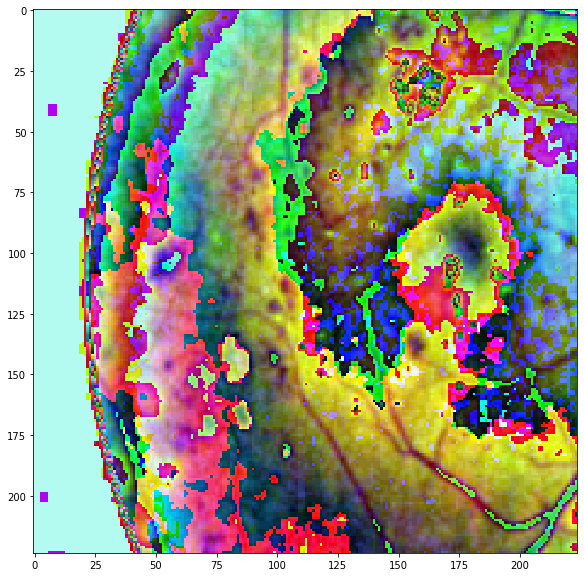

In [4]:
training_transform = transforms.Compose([transforms.Resize((256,256)),
                                         transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.5210, 0.2750, 0.0855],
                                                             [0.1548, 0.0905, 0.0394])
                                        ])
                                         


test_transform = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5210, 0.2750, 0.0855],
                                                             [0.1548, 0.0905, 0.0394])
                                    ])

torchvision_dataset = TorchvisionDataset(
file_paths = ["/home/haykim/dataset/train_images/1/fb696a8e055a.png"],
labels = [1],
transform=training_transform, #test_transform
)






total_time = 0
for i in range(100):
    sample, _, transform_time = torchvision_dataset[0]
    total_time += transform_time

print("torchvision time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10,10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()


In [5]:
class AlbumentationDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self. transform = transform
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        #Read an image with OpenCV
        image = cv2.imread(file_path)
        
        #By default OpenCV uses BGR color space for color images,
        #So we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
            total_time = (time.time() - start_t)
        return image, label, total_time
    
    



albumentations time/sample: 2.3340773582458496 ms


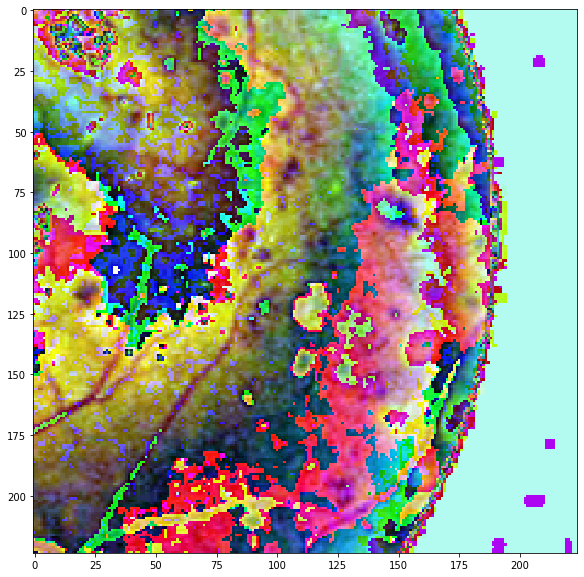

In [6]:
"""torchvision_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])
"""
from albumentations.pytorch import ToTensor
from albumentations.pytorch.transforms import ToTensor


#Same tranform with torchvision_transform

training_albumentations_transform = albumentations.Compose([
    albumentations.Resize(256,256),
    albumentations.RandomResizedCrop(224,224),
    albumentations.HorizontalFlip(), #Same with transforms.RandomHorizontalFlip()
    albumentations.augmentations.transforms.Normalize((0.5210, 0.2750, 0.0855),
                                                      (0.1548, 0.0905, 0.0394)),
    albumentations.pytorch.transforms.ToTensor()
    
])



test_albumentations_transform = albumentations.Compose([
    albumentations.Resize(256,256),
    albumentations.CenterCrop(224,224),
    albumentations.augmentations.transforms.Normalize((0.5210, 0.2750, 0.0855),
                                                      (0.1548, 0.0905, 0.0394)),
    albumentations.pytorch.transforms.ToTensor()
])



albumentations_dataset = AlbumentationDataset(
file_paths=["/home/haykim/dataset/train_images/1/fb696a8e055a.png"],
labels = [1],
transform=training_albumentations_transform, #test_albumentations_transform
)

total_time = 0
for i in range(100):
    sample, _, transform_time = albumentations_dataset[0]
    total_time += transform_time

print("albumentations time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10,10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()